<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2023/blob/main/Unidad_3/03_Busqueda_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Búsqueda binaria

La búsqueda binaria es un constructo muy útil que sirve para mejorar el tiempo de ejecución de muchos algoritmos que operan sobre listas.

## Intuición

Imaginemos que tenemos una lista ordenada, y queremos determinar si contiene a un elemento $x$. Podríamos (ingenuamente) recorrer toda la lista y compara elemento por elemento; sin embargo, como la lista está ordenada, y asumiendo que estamos parados en un índice $i$, podemos notar lo siguiente:

* Si $L_i < x$, entonces tenemos que checar solo los elementos a la derecha de $L_i$ (i.e., aquellos con un índice mayor a $i$), ya que sabemos que todos los elementos a la izquierda también serán menores que $x$.
* Por el mismo razonamiento, si $x<L_i$, solo tenemos que checar los elementos a la izquierda.
* Finalmente, si $x=L_i$, habremos terminado.

Implementamos esto en la siguiente celda:

In [3]:
def b_search(L, x):
    l = 0
    r = len(L) - 1
    while l <= r:
        m = (l+r)//2
        if L[m] == x:
            return m
        elif L[m] > x:
            r = m-1
        elif L[m] < x:
            l = m+1
    return

Tomando una lista de ejemplo:

In [4]:
x = 0
L = list(sorted(np.random.randint(-10, 10, 20)))
print(L)

idx = b_search(L, x)
print(f"El {x} se encuentra en el índice {idx}")

[-10, -10, -10, -6, -6, -4, -4, -4, -3, -3, -2, -2, 0, 1, 3, 6, 7, 7, 8, 9]
El 0 se encuentra en el índice 12


## Extensión

Este método puede extenderse a toda clase de problemas que impliquen buscar sobre una lista hasta que uno de sus elementos cumpla una cierta condición. Para evitar estar reescribiendo la función anterior cada vez que queramos cambiarla, la generalizamos de la siguiente manera:

In [8]:
def binary_search(L, det):
    l = 0
    r = len(L) - 1
    while l <= r:
        m = (l+r)//2
        res = det(L, m)
        if res == 0:
            return m
        elif res > 0:
            r = m-1
        elif res < 0:
            l = m+1

Nótese que cambiamos el argumento `x` por `det`. Esta es una función de dos argumentos que en cada iteración evaluamos sobre `(L, m)`, y consideramos su resultado de la siguiente forma:

* Si `det(L, m) < 0`, tomamos la sublista de la izquierda.
* Si `det(L, m) > 0`, tomamos la sublista de la derecha.
* Si `det(L, m) = 0`, regresamos.

Entonces, nuestro problema de búsqueda binaria original puede reescribirse con la función:

$$
det(L, m) = L_m - x
$$

In [6]:
det = lambda L, m: L[m] - 0
idx = binary_search(L, det)
print(f"El {x} se encuentra en el índice {idx}")

El 0 se encuentra en el índice 12


# Ejemplos

## Puntos fijos

Consideremos una lista $L$ de números enteros en orden estrictamente creciente. Nuestro objetivo será determinar si existen o no puntos fijos, es decir, si existen elementos tales que $i = L[i]$.

Podemos utilizar búsqueda binaria para este problema, ya que si estamos parados en un índice $i$, tenemos tres posibilidades:

*   $i = L_i$, en cuyo caso hemos terminado.
*   $i < L_i$, dado que $L$ tiene puros enteros, y están en orden creciente, se tiene que para cualquier $j > i$, $j < L[j]$, por lo que nos queda restringirnos a los índices menores que $i$.
*   $i > L_i$ de manera análoga al caso anterior se tiene que podemos restringir nuestra búsqueda a los índices mayores que $i$.

Entonces, nuestra función determinante es simplemente:

$$
det(L, m) = L_m - m
$$

In [12]:
L = [-4, -1, 0, 1, 4, 6, 8]
det = lambda L, m: L[m] - m
idx = binary_search(L, det)
print(f"El punto fijo está en el lugar {idx}")

El punto fijo está en el lugar 4


## Picos

Aupongamos ahora que tenemos una lista (con al menos tres elementos) en forma de pico, es decir, que existe un elemento tal que todos los elementos antes de él estan en orden creciente, y todos los elementos posteriores están en orden decreciente. ¿Cómo encontrar el dicho pico?

Si estamos parados en el $i-$ésimo elemento, se tienen tres casos:

* $L_{i-1} < L_{i} < L_{i+1}$, en este caso, sabemos que el pico se encuentra a la derecha de $i$.
* $L_{i-1} > L_{i} > L_{i+1}$, en este caso, sabemos que el pico se encuentra a la izquierda de $i$.
* $L_{i-1} < L_{i}$ y $L_{i} > L_{i+1}$, en este caso hemos encontrado el pico de la lista, pues es el único elemento que cumple ambas desigualdades.

Dadas estas condiciones, podemos escribir el determinante como:

In [18]:
def det_peak(L, m):
    if L[m-1] < L[m] < L[m+1]:
        return 1
    elif L[m-1] > L[m] > L[m+1]:
        return -1
    else:
        return 0

Tomando la siguiente lista:

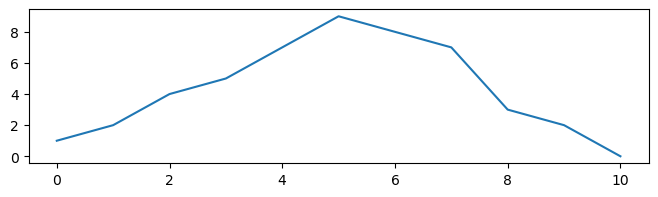

In [19]:
L = [1, 2, 4, 5, 7, 9, 8, 7, 3, 2, 0]

fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(L)

Aplicando la función:

In [23]:
idx = binary_search(L, det_peak)
print(f"El pico está en el lugar {idx}, y es {L[idx]}.")

El pico está en el lugar 5, y es 9.


## Raíz cuadrada

Hasta ahora hemos visto ejemplos de búsqueda binaria en casos discretos. Sin embargo, podemos extenderla al caso continuo. Por ejemplo, si queremos calcular la raíz cuadrada de $x$, basta con notar que, si estamos parados en un cierto número $a$, se tienen 3 casos:

*   Si $a^2 < x$, entonces podemos restringir nuestra búsqueda a números mayores que $a$.
*   Si $a^2 > x$, podemos restringir la búsqueda a números menores que $a$.
*   Si $a^2 = x$, hemos terminado.

En la práctica, es muy poco probable que $a^2$ sea exactamente igual a $x$, debido a la manera en que se representan los números de punto flotante. Entonces, en vez de checar la igualdad, hacemos:

$$
|a^2-x|<\epsilon
$$

Donde $\epsilon$ es una cierta tolerancia.

Finalmente, hay que notar que podemos restringir los intervalos de búsqueda de la siguiente manera:

* Si $x<0$, no es posible encontrar una solución.
* Si $0\leq x<1$, nos restringimos al intervalo $[0,1)$.
* Si $1\leq x$, nos quedamos en el intervalo $[1, x]$.

Con todo esto, escribimos el algoritmo correspondiente:

In [25]:
def sqrt(x, e=1e-6):
    assert x > 0, "El número no tiene raíz cuadrada en los reales"
    
    if 0 <= x < 1:
        l, r = 0, 1
    else:
        l, r = 1, x
        
    while l < r:
        m = (l+r)/2
        a = m*m
        if abs(a - x) < e:
            return m
        elif a > x:
            r = m
        elif a < x:
            l = m
    return (l+r)/2

Aplicándolo a $12^2=144$:

In [26]:
print(sqrt(144))

12.000000010244548


## Picos continuos

Recordando el ejemplo anterior de los picos, supongamos que ahora tenemos una función $f:[a,b]\rightarrow \mathbb{R}$, tal que tiene un único pico en el intervalo $[a,b]$. ¿Cómo lo encontramos?

Como ahora estamos en la recta real, expresiones con índices de la forma $L_i$ no tienen sentido, ya que no podemos tomar el "siguiente número real". Debido a esto, tenemos que partir el intervalo en *tres* partes, en vez de dos. Entonces, sean $l$ y $r$ el primer y segundo tercio del intervalo $[a,b]$. De esto, se siguen las siguientes observaciones:

* Si $f(l) < f(r)$, podemos descartar el intervalo $[a, l]$.
* Si $f(l) > f(r)$, podemos descartar el intervalo $[r, b]$.
* Si $f(l) = f(r)$, podemos descartar tanto el intervalo $[a, l]$ como el $[r, b]$, ya que sabemos que el pico estará en el intervalo de en medio.

In [28]:
def peak_cont(f, a, b, e=1e-6):
    while b - a >= e:
        l = a + (b-a)/3
        r = b - (b-a)/3
        f1 = f(l)
        f2 = f(r)
        if f1 < f2:
            a = l
        elif f1 > f2:
            b = r
        else:
            a = l
            b = r
    return (a+b)/2

Aplicándola a la función 

$$
f(x) = x^3 + 3x^2
$$

En el intervalo $[-3, 0]$:

In [35]:
f = lambda x: x**3 + 3 * x**2
p = peak_cont(f, -3,0)
p

-2.000000042236351

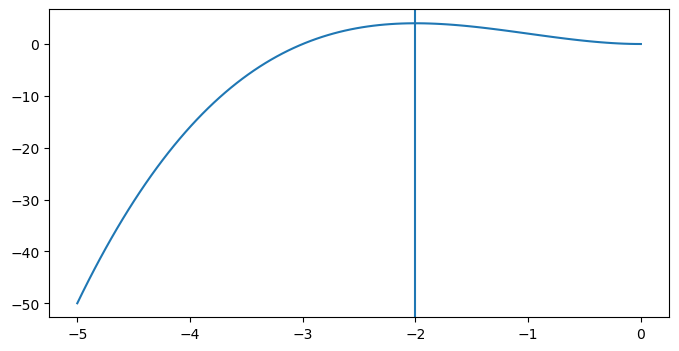

In [39]:
x = np.linspace(-5, 0, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)
ax.axvline(p, 0, 1)

(lo cual se puede hacer en $O(n)$). Basta con encontrar la mayor suma por la derecha y la mayor suma por la izquierda para listas que contengan a $L_m$.

## Sublista con suma máxima

Dada una lista $L$ de números reales, encontrar la mayor suma posible de una sublista no vacía (con elementos contiguos).

El problema se puede resolver de forma sencilla iterando sobre los posibles extremos de la lista, sin embargo, esto nos da una complejidad de al menos $O(n^2)$, ¿se puede mejorar?

Consideremos dividir el problema de la siguiente forma: 

1. Sea $m$ la mitad de la longitud de la lista (que es $n$).
2. Resolvemos el problema para la lista formada por $[L_0, L_1, \ldots, L_{m-1}]$. Este regresa un número, llámese $r_1$.
3. Resolvemos el problema para la lista formada por $[L_{m+1}, L_{m+2}, \ldots, L_n]$. Llámese al resultado $r_2$.
4. Encontramos la lista de mayor suma que contenga al elemento $L_m$, llámese a esta suma $r_3$.
5. Devolvemos el máximo de $\{r_1, r_2, r_3\}$.

Nótese que tenemos dos casos base:

1. Si la lista solo tiene un elemento, regresamos dicho elemento.
2. Si la lista tiene dos elementos, $a$ y $b$, regresamos el máximo de $\{a,b, a+b\}$.

Finalmente, el paso 4 del algoritmo requiere de especial atención. Supongamos que tenemos la lista $L$ y el índice $m$, y queremos encontrar la sublista que contenga a $L_m$ que tiene la mayor suma. Podemos hacer esto de la siguiente manera:

1. Calculamos la suma más grande de la lista $[L_0, L_1, \ldots, L_m]$. Como la sublista debe de contener a $L_m$, podemos empezar de dicho número, e irnos moviendo hacia la izquierda, checando si la suma hasta este punto es mayor que el máximo encontrado, llámese $m_1$
2. Hacemos lo mismo para la lista $[L_m, L_{m+1}, \ldots, L_{n}]$, pero nos movemos hacia la derecha. Llamamos al máximo de esta parte $m_2$.
3. Existe una tercera posibilidad, que el máximo se encuentre en una sublista de la forma $[L_i, \ldots, L_m, \ldots, L_j]$. Sin embargo, como ya calculamos el máximo de la parte izquierda y de la derecha, el máximo valor de esta sublista es:

$$
m_3 = m_1 + m_2 - L_m
$$

(Restamos $L_m$ ya que está considerado tanto en $r_1$ como en $r_2$).

4. Finalmente, calculamos el máximo de $\{m_1, m_2, m_3\}$.

Con esto, podemos escribir el algoritmo:

In [47]:
def max_sum(L, l=None, r=None):
    if l is None:
        l = 0
    if r is None:
        r = len(L) - 1
        
    if l == r: # Primer caso base
        return L[l]
    elif l == r - 1: # Segundo caso base
        return max(L[l], L[r], L[r]+L[l])
    
    m = (l+r)//2
    r1 = max_sum(L, l, m-1)
    r2 = max_sum(L, m+1, r)
    r3 = mid_sum(L, m, l, r)
    return max(r1, r2, r3)

def mid_sum(L, m, l, r):
    m1 = m2 = float("-inf")
    sum_r = sum_l = 0
    
    # Suma de la izquierda
    idx = m
    while idx >= l:
        sum_l += L[idx]
        if sum_l > m1:
            m1 = sum_l
        idx -= 1
    
    # Suma de la derecha
    idx = m
    while idx <= r:
        sum_r += L[idx]
        if sum_r > m2:
            m2 = sum_r
        idx += 1
    
    # Suma de la lista de en medio
    m3 = m1 + m2 - L[m]
    return max(m1, m2, m3)

Aplicándolo a la siguiente lista:

In [48]:
L = [-2, -5, 6, -2, -3, 1, 5, -6]
max_sum(L)

7